In [1]:
import os
import cv2 as cv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from keras.applications import ResNet50 , ResNet152V2
from keras.applications import MobileNetV3Small


# 한글 깨짐 방지
plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

In [ ]:
###################################################### 실행 안함. 자동완성용

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
######################################################

In [2]:
## 전역

folder_list = os.listdir('/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train')
folder_list.remove('.DS_Store') 
data = []
pic_count = []


## 메인

for folder_name in folder_list:
    folder_path = '/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/train/' + folder_name
  
    image_list = os.listdir(folder_path)
    list_len = len(image_list)
    pic_count.append(list_len)
    
    for image_name in image_list:
        image_path = folder_path +'/' + image_name
        img = load_img(image_path, target_size = (400,400))
        data.append(np.array(img))
        
        
answer = []
for idx, nm in enumerate(folder_list):
        answer += [nm] * pic_count[idx]

Text(0.5, 1.0, '훼손')

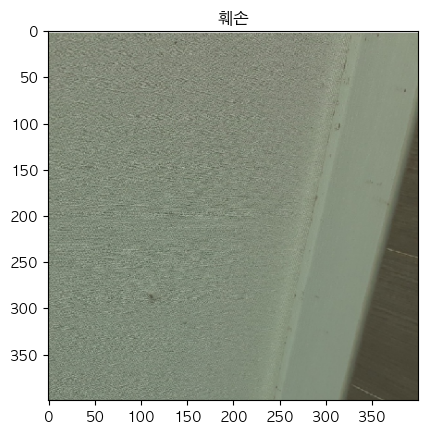

In [3]:
num = 3440
plt.imshow(data[num])
plt.title(answer[num])

In [4]:
vcount = pd.DataFrame(answer).value_counts()
vcount = pd.DataFrame(vcount).reset_index().rename(columns={0 : 'class'})
fig = px.bar(vcount, x= vcount['class'], y=vcount['count'], text=vcount['count'])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8)

In [5]:
answer = np.array(answer)
answer = pd.get_dummies(answer)
answer = answer.values

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(np.array(data), answer, test_size=0.2, shuffle=True)
print(xtrain.shape)
print(xtest.shape)
#xtrain = xtrain.astype('float32')/255
# xtest = xtest.astype('float32')/255

(2765, 400, 400, 3)
(692, 400, 400, 3)


In [7]:
model = Sequential()
model.add(ResNet50(weights='imagenet', include_top=False, input_shape=(400,400,3)))
model.add(Dense(128,activation = 'leaky_relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation = 'leaky_relu'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(19, activation = 'softmax'))

model.summary()
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 13, 13, 2048)      23587712  
                                                                 
 dense (Dense)               (None, 13, 13, 128)       262272    
                                                                 
 dropout (Dropout)           (None, 13, 13, 128)       0         
                                                                 
 dense_1 (Dense)             (None, 13, 13, 64)        8256      
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dropout_1 (Dropout)         (None, 10816)             0         
                                         

In [8]:
modelpath="resnet50_bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
train_datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=True,
        rescale=1./255) 

test_datagen = ImageDataGenerator(rescale=1./255)

train_data_generator = train_datagen.flow(xtrain, ytrain, batch_size=30)
test_data_generator = test_datagen.flow(xtest,ytest, batch_size=30)

In [19]:
history = model.fit_generator(generator= train_data_generator,  validation_data=test_data_generator , epochs = 100, verbose=1, callbacks=[early_stopping_callback,checkpointer])
# steps_per_epoch=len(xtrain)//30 * 10, validation_steps=len(xtest)//30

Epoch 1/100
93/93 [==============================] - 139s 1s/step - loss: 1.8310 - accuracy: 0.4300 - val_loss: 2.2260 - val_accuracy: 0.3783
Epoch 2/100
93/93 [==============================] - 130s 1s/step - loss: 1.6846 - accuracy: 0.4752 - val_loss: 2.5701 - val_accuracy: 0.4087
Epoch 3/100
93/93 [==============================] - 132s 1s/step - loss: 1.5840 - accuracy: 0.4995 - val_loss: 2.3496 - val_accuracy: 0.4217
Epoch 4/100
93/93 [==============================] - 129s 1s/step - loss: 1.5463 - accuracy: 0.5136 - val_loss: 2.5554 - val_accuracy: 0.3870
Epoch 5/100
93/93 [==============================] - 131s 1s/step - loss: 1.4938 - accuracy: 0.5168 - val_loss: 2.3805 - val_accuracy: 0.4043
Epoch 6/100
93/93 [==============================] - 130s 1s/step - loss: 1.4468 - accuracy: 0.5324 - val_loss: 2.5384 - val_accuracy: 0.3522
Epoch 7/100
93/93 [==============================] - 127s 1s/step - loss: 1.4252 - accuracy: 0.5371 - val_loss: 2.3615 - val_accuracy: 0.4043
Epoch 

In [21]:
xtest = xtest.astype('float32')/255
my_model = load_model('resnet50_bestmodel.hdf5')
score = my_model.evaluate(xtest, ytest)
print('Test accuracy:', score[1])

22/22 [==============================] - 11s 425ms/step - loss: 1.3860 - accuracy: 0.5650
Test accuracy: 0.5650289058685303


22/22 [==============================] - 11s 433ms/step


Text(70.72222222222221, 0.5, 'true label')

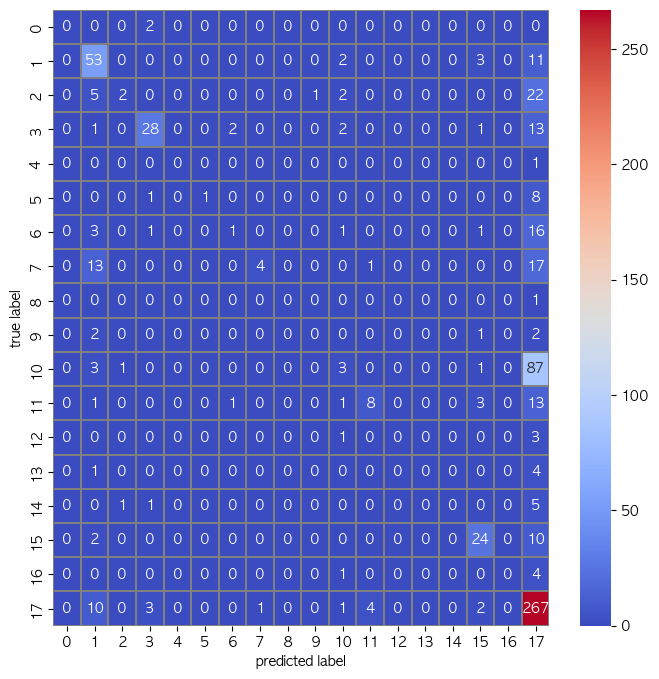

In [22]:
y_pred = my_model.predict(xtest)
y_pred_cls = np.argmax(y_pred,1)
y_true = np.argmax(ytest, axis=1)

cmat = confusion_matrix(y_true,y_pred_cls)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(cmat, annot=True, linewidths=0.01,cmap="coolwarm",linecolor="gray", fmt= '1d',ax=ax)
plt.xlabel('predicted label')
plt.ylabel('true label')

In [15]:
# submit format /// 이미지 자체를 test 값으로 집어 넣을 경우의 code
# test.csv가 있기 때문에 이걸 이용해서 간단하게 경로를 지정해서 이미지를 변환 할 수도 있다.
test_data = []
test_folder_path = '/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/test/'

image_list = os.listdir(test_folder_path)
list_len = len(image_list)
pic_count.append(list_len)

for test_image_name in image_list:
    test_image_path = test_folder_path +'/' + test_image_name
    test_img = load_img(test_image_path, target_size = (400,400))
    test_data.append(np.array(test_img))

test_data = np.array(test_data).astype('float32')/255

final_pred = my_model.predict(test_data)

25/25 [==============================] - 15s 590ms/step


In [16]:
final_test_pred=np.argmax(final_pred,axis=1)
submit=pd.read_csv('/Users/jsp/Desktop/workspace/projects/fstteamproject/main/git_teamprj/proj1/open/sample_submission.csv')
submit_result = pd.DataFrame({'id': submit['id'], 'label': final_test_pred})
submit_result['label'] = submit_result['label'].map(dict(zip(range(19),folder_list)))
submit_result.to_csv('submission.csv', index=False)
pd.read_csv('submission.csv') # 제출할 목록 내용 빠르게 확인

,id,label
0,TEST_000,피스
1,TEST_001,틈새과다
2,TEST_002,틈새과다
3,TEST_003,틈새과다
4,TEST_004,틈새과다
...,...,...
787,TEST_787,틈새과다
788,TEST_788,피스
789,TEST_789,틈새과다
790,TEST_790,틈새과다
